In [1]:
from tools import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

d = manual_load_data('clean_data.pkl')

In [2]:
# Define a function that returns coordinates of a straight line connecting two points in 3d

def get_3d_line(vec_x, vec_y, vec_z):
        
    x0 = vec_x[0]; x1 = vec_x[-1]
    y0 = vec_y[0]; y1 = vec_y[-1]
    z0 = vec_z[0]; z1 = vec_z[-1]
    
    a = x1 - x0
    b = y1 - y0
    c = z1 - z0
   
    t = np.linspace(0, 1, len(vec_x))
    xs = np.array([x0 + t*a])
    ys = np.array([y0 + t*b])
    zs = np.array([z0 + t*c])
    
    return (xs[0], ys[0], zs[0])

In [3]:
tr = d['P11']['trials']['t16']
ro = np.where(np.array(tr['startmovement']) == 1)[0][0]
print ro

x = tr['wrist11x'][ro:]
y = tr['wrist11y'][ro:]
z = tr['wrist11z'][ro:]

linex, liney, linez = get_3d_line(x, y, z)

print linex[0] == x[0]
print linex[-1] == x[-1]

918
True
True


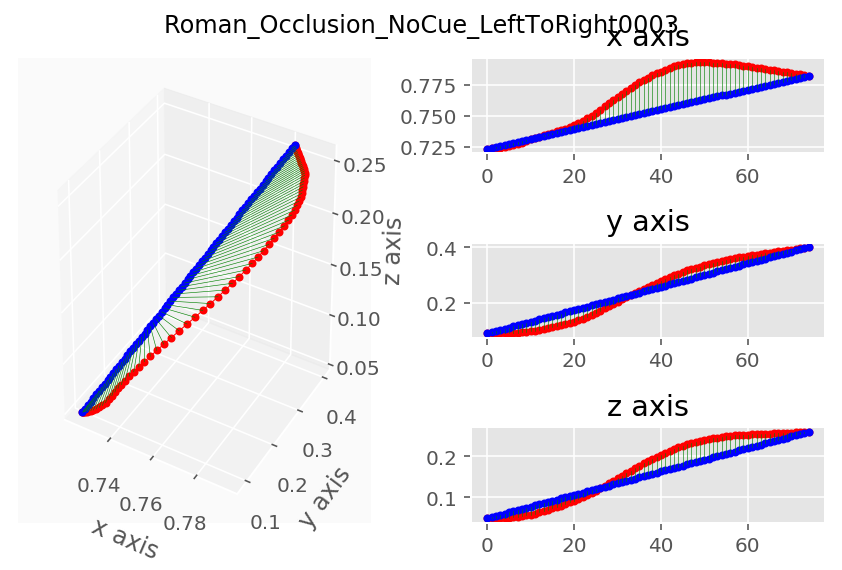

In [4]:
# %matplotlib qt

fig = plt.figure()

ax1 = fig.add_subplot(121, projection = '3d')

ax1.plot(x, y, z, 'r.-', linewidth = 0.5)
ax1.plot(linex, liney, linez, 'b.-')

for i in range(len(x)):
    ax1.plot([x[i], linex[i]],
            [y[i], liney[i]],
            [z[i], linez[i]], 'g-', linewidth = 0.3)

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')
# ax1.set_title(tr['name'])
ax1.set_facecolor([0.98, 0.98, 0.98])

ax2 = fig.add_subplot(322)
ax2.plot(x, 'r.-', linewidth = 0.5)
ax2.plot(linex, 'b.-', linewidth = 0.5)
for i in range(len(x)):
    ax2.plot([i, i], [x[i], linex[i]], 'g-', linewidth = 0.3)
ax2.set_title('x axis')


ax3 = fig.add_subplot(324)
ax3.plot(y, 'r.-', linewidth = 0.5)
ax3.plot(liney, 'b.-', linewidth = 0.5)
for i in range(len(x)):
    ax3.plot([i, i], [y[i], liney[i]], 'g-', linewidth = 0.3)
ax3.set_title('y axis')


ax4 = fig.add_subplot(326)
ax4.plot(z, 'r.-', linewidth = 0.5)
ax4.plot(linez, 'b.-', linewidth = 0.5)
for i in range(len(x)):
    ax4.plot([i, i], [z[i], linez[i]], 'g-', linewidth = 0.3)
ax4.set_title('z axis')

plt.suptitle(tr['name'])
plt.tight_layout()
plt.show()

In [5]:
def get_intersect(l0, l1, p):
    l0x = l0[0]; l0y = l0[1]; l0z = l0[2]
    l1x = l1[0]; l1y = l1[1]; l1z = l0[2]
    px = p[0]; py = p[1]; pz = p[2]
    
    u = (px - l0x) * (l1x - l0x) + (py - l0y) * (l1y - l0y) + (pz - l0z) * (l1z - l0z)
    dist = np.sqrt( (l1x - l0x)**2 + (l1y - l0y)**2 + (l1z - l0z)**2 )
    u = u / (dist**2)
    
    tx = l0x * (l1x - l0x)
    ty = l0y * (l1y - l0y)
    tz = l0z * (l1z - l0z)
    
    return (tx, ty, tz)

In [6]:
# https://arstechnica.com/civis/viewtopic.php?f=26&t=149128
# http://www.math.ucla.edu/~ronmiech/Calculus_Problems/32A/chap11/section5/717d57/717_57.html
# http://people.math.sc.edu/filaseta/courses/Math241/Math241Quiz4Fall2013Sols.pdf


x0 = x[0]; x1 = x[-1]
y0 = y[0]; y1 = y[-1]
z0 = z[0]; z1 = z[-1]

a = x1 - x0
b = y1 - y0
c = z1 - z0



In [10]:
%matplotlib qt

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.plot(x, y, z, 'r-')
ax.plot(linex, liney, linez, 'b-')

ax.scatter(x[30], y[30], z[30], 'r.')
ax.scatter(linex[30], liney[30], linez[30], 'b.')
ax.plot([x[30], linex[30]], [y[30], liney[30]], [z[30], linez[30]], 'g-')

ax.scatter([x[30] + a],
           [y[30] + b],
           [z[30] + c], 'ko')


plt.show()

In [26]:
%matplotlib qt

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(5, 4, -7, 'r.')

t = np.linspace(-10, 10, 100)
xs = t
ys = -3 - t
zs = 4 + 2*t

xs1 = 5 + 3*t
ys1 = 4 + t
zs1 = -7 - t

plt.plot(xs, ys, zs, 'b-')
plt.plot(xs1, ys1, zs1, 'g-')


plt.show()